# Kaggle Competiton | BNP Paribas Cardif Claims Management

>We evaluate which parameters of Random Forest classifier provides the best score, in this case the highest area under the ROC Curve.

>The data set is splited in two groups. Each pair of groups will generate a model and a prediction for the given combination of parameters through Grid Search. 

>The predictions will be evaluated by generating the area under the ROC Curve. It will be visualized by ploting a heatmap with the scores and the parameters combination. 

>The choosen parameters will be used in run_predict.py for final prediction.

Go to the official page of the [Kaggle Competition.](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management)

### Goal for this Notebook:
* Generate datasets and predictions for different parameter's combinations through Grid Search
* Compare predictions for different parameters in a heatmap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import grid_search
from scipy import stats
from data_modifier import *

%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


### 1. Load and Split Data

* Load data and split train dataset into train and test 80%-20%

In [2]:
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")

In [3]:
tr_a, te_a = train_test_split(train, train_size = 0.8) 
y_train = tr_a.target
y_test = te_a.target
columns = train.columns
x_train = tr_a[columns[2:]]
x_test = te_a[columns[2:]]

### 2. Generate a Model and a Prediction

#### 2.1. Grid Search
* Choose differnt combinations of Random Forest parameters for Grid Search
* Generate a prediction for each combination of parameters

In [6]:
param_grid_1 =  {'randomforestclassifier__max_depth': [8,16],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[20,100], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[10], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_2 =  {'randomforestclassifier__max_depth': [16,300],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[5,10], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[10], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_3 =  {'randomforestclassifier__max_depth': [16,75],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[2,5], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[10], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_4 =  {'randomforestclassifier__max_depth': [8,16],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[10], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1,5], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_5 =  {'randomforestclassifier__max_depth': [16,25],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[10,50], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_6 =  {'randomforestclassifier__max_depth': [25,40],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[5,10], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_7 =  {'randomforestclassifier__max_depth': [40,55],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[5,10], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_8 =  {'randomforestclassifier__max_depth': [40,60],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[100,500], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}
param_grid_9 =  {'randomforestclassifier__max_depth': [40,60],
               'randomforestclassifier__criterion': ['gini'], 
               'randomforestclassifier__n_estimators':[2,5], 
               'randomforestclassifier__max_leaf_nodes':[None], 
               'randomforestclassifier__min_samples_split':[2],
               'randomforestclassifier__min_samples_leaf':[1], 
               'randomforestclassifier__min_weight_fraction_leaf':[0.0],
               'randomforestclassifier__n_jobs':[1]
}

In [7]:
call = PipelineBNP(RandomForestClassifier)
gs = grid_search.GridSearchCV(call, param_grid_9, cv=2, scoring='roc_auc', n_jobs=2, pre_dispatch='n_jobs')
gs = gs.fit(x_train,y_train)

pipeline done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.
NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(45728, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

NullToNaNTrans fit done.
NullToNaNTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
DataSpliterTrans fit done.
DataSpliterTrans transform done.
ObjtoCatStrtoIntTrans fit done.
(91456, 19)
ObjtoCatStrtoIntTrans transform done.


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

* Check the output to extract scores and parameters for the heatmap

In [8]:
sco = gs.grid_scores_
sco

[mean: 0.59909, std: 0.00510, params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_depth': 40, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__n_estimators': 2, 'randomforestclassifier__n_jobs': 1, 'randomforestclassifier__min_samples_leaf': 1},
 mean: 0.63906, std: 0.00106, params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_depth': 40, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__n_estimators': 5, 'randomforestclassifier__n_jobs': 1, 'randomforestclassifier__min_samples_leaf': 1},
 mean: 0.58474, std: 0.00243, params: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_depth': 60, 'randomforestcl

In [9]:
meanv = np.zeros(len(sco))
deptv = np.zeros(len(sco),dtype=np.int)
estiv = np.zeros(len(sco),dtype=np.int)
deptk = [i for i in sco[0].parameters.keys()][2]
estik = [i for i in sco[0].parameters.keys()][5]

l = 0
while l < len(sco):
    mean = sco[l].mean_validation_score
    par = sco[l].parameters.values()
    values = [v for v in par]
    meanv[l] = mean
    estiv[l] = values[5]
    deptv[l] = values[2]
    l += 1
print(deptk,estik)

randomforestclassifier__max_depth randomforestclassifier__n_estimators


#### 2.2. Evaluation of the Parameters

[[ 0.59909393  0.63906173]
 [ 0.58474076  0.63301117]]


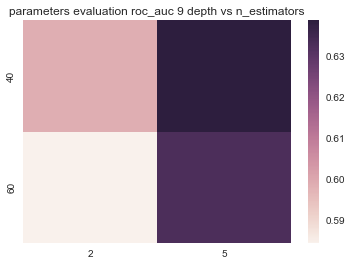

In [11]:
ma = np.matrix([[meanv[0], meanv[1]], [meanv[2], meanv[3]]], dtype=np.float64)
scores = pd.DataFrame(ma,columns=np.unique(estiv),index=np.unique(deptv))
ax = sns.heatmap(scores)
ax.set_title('parameters evaluation roc_auc 9 depth vs n_estimators')
ax.set_title
fig = ax.get_figure()
fig.savefig("par_eval_9_depth40_60_esti2_5.png")
print(ma)

In [12]:
y_predict = gs.predict_proba(x_test)

NullToNaNTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
DataSpliterTrans transform done.
(22865, 19)
ObjtoCatStrtoIntTrans transform done.


In this last case the combination of maximal depth of trees 40 and 5 number of estimators gives the highest area under the ROC Curve.

The best combination of parameters will be choosen for runing the final prediction with run_predict.py. The results will be written into results.csv and uploaded to Kaggle competition.